ต้องการดูอัตราส่วน ระหว่าง เงินสด ต่อ หนี้สินรวม ของแต่ละบริษัท

In [3]:
# import Library ที่จะใช้งาน
import pandas as pd               # ใช้สำหรับแปลงข้อมูลเป็น DataFrame
import matplotlib.pyplot as plt   # ใช้สำหรับ Plot Graph
from selenium import webdriver    # ใช้สำหรับ ดึงข้อมูลจาก Dynamic Website

In [2]:
# กรณีเก็บข้อมูลหุ้นจาก file excel เข้าตัวแปร df
# df = pd.read_excel('ธุรกิจพาณิชย์.xlsx')   # กรณีที่ file มีข้อมูลแค่ 1 sheet

df = pd.read_excel('ธุรกิจพาณิชย์.xlsx', sheet_name='การแพทย์')   # กรณีที่ file มีข้อมูลมากกว่า 1 sheet
df   # แสดงตารางข้อมูล

,หลักทรัพย์,ตลาด,กลุ่มอุตสาหกรรม,หมวดธุรกิจ
0,AHC,SET,บริการ,การแพทย์
1,BCH,SET,บริการ,การแพทย์
2,BDMS,SET,บริการ,การแพทย์
3,BH,SET,บริการ,การแพทย์
4,CHG,SET,บริการ,การแพทย์
5,CMR,SET,บริการ,การแพทย์
6,EKH,SET,บริการ,การแพทย์
7,KDH,SET,บริการ,การแพทย์
8,LPH,SET,บริการ,การแพทย์
9,M-CHAI,SET,บริการ,การแพทย์


In [4]:
# เก็บชื่อหุ้นไว้ในตัวแปร stock
stock = df['หลักทรัพย์']
stock

0        AHC
1        BCH
2       BDMS
3         BH
4        CHG
5        CMR
6        EKH
7        KDH
8        LPH
9     M-CHAI
10       NEW
11       NTV
12       PHG
13       PR9
14     PRINC
15       RAM
16       RJH
17       RPH
18       SKR
19       THG
20     VIBHA
21       VIH
22       WPH
Name: หลักทรัพย์, dtype: object

In [6]:
# ดึงตารางข้อมูล ทรัพย์สิน และ หนี้สิน
all_stock_dict = dict()
driver = webdriver.Chrome()

for st in stock:
    url = 'https://www.set.or.th/th/market/product/stock/quote/'+ st +'/financial-statement/latest/balance'
    driver.get(url)
    stock_data = driver.page_source
    table1_df = pd.read_html(stock_data)[0]
    table2_df = pd.read_html(stock_data)[1]
    all_stock_dict[st] = [table1_df, table2_df]

In [11]:
# set index เป็นชื่อ column ชื่อของข้อมูลที่ต้องการจะดึง
for key in all_stock_dict.keys():
   
     all_stock_dict[key][0].set_index(0, inplace=True)   
     all_stock_dict[key][1].set_index(0, inplace=True)

In [14]:
# ดึงเฉพาะข้อมูลที่ต้องการ นำมาคำนวณค่าอัตราส่วนระหว่าง เงินสด ต่อ หนี้สินรวม
result_dict = dict()

for key in all_stock_dict.keys():
    try:
        money = float(all_stock_dict[key][0][1]['เงินสดและรายการเทียบเท่าเงินสด'])
        debt = float(all_stock_dict[key][1][1]['รวมหนี้สิน'])
        select_data = money / debt
        result_dict[key] = float(select_data)
    except KeyError:
        pass
    except ValueError:
        pass

In [15]:
result_dict

{'AHC': 0.5739552627015779,
 'BCH': 0.3828711604956203,
 'BDMS': 0.23944831419528353,
 'BH': 0.796089626933576,
 'CHG': 0.5547824301324098,
 'CMR': 0.07387571967440937,
 'EKH': 1.3420904422726518,
 'KDH': 1.13707268503153,
 'LPH': 0.08637450016086777,
 'M-CHAI': 0.01598871384904773,
 'NEW': 0.23776223776223773,
 'NTV': 2.501117701409794,
 'PHG': 0.22892890143096173,
 'PR9': 1.3296848750190906,
 'PRINC': 0.06126730178225894,
 'RAM': 0.07347815583595042,
 'RJH': 0.10818706044257574,
 'RPH': 1.584017758046615,
 'SKR': 0.2141427932487465,
 'THG': 0.08909194393024257,
 'VIBHA': 0.04908573348242469,
 'VIH': 1.375263479975522,
 'WPH': 0.0205030551922974}

In [22]:
# แปลงข้อมูลจาก dictionry เป็น DataFrame เตรียม plot graph  และทำการ Transpose ตาราง
result_df = pd.DataFrame([result_dict])
result_df = result_df.transpose()

In [23]:
result_df

,0
AHC,0.573955
BCH,0.382871
BDMS,0.239448
BH,0.796090
CHG,0.554782
CMR,0.073876
EKH,1.342090
KDH,1.137073
LPH,0.086375
M-CHAI,0.015989


In [24]:
# เรียงลำดับจากมากไปหาน้อย
result_df = result_df.sort_values(by=0, ascending=False)
result_df

,0
NTV,2.501118
RPH,1.584018
VIH,1.375263
EKH,1.342090
PR9,1.329685
KDH,1.137073
BH,0.796090
AHC,0.573955
CHG,0.554782
BCH,0.382871


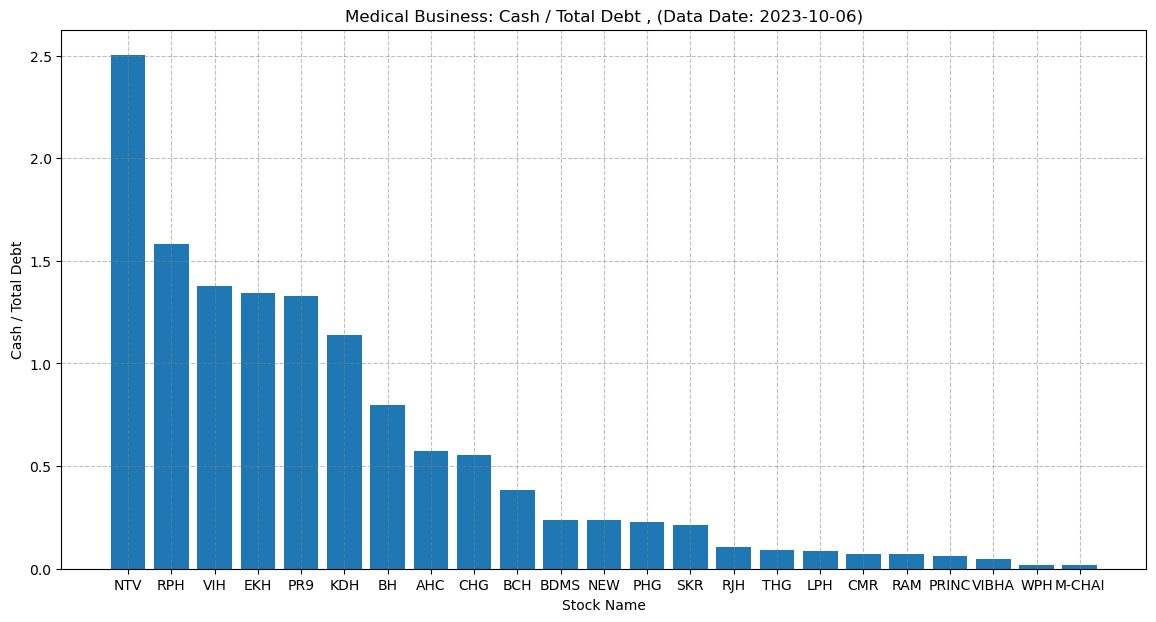

In [29]:
# Plot Graph
threshold = 100000  # Set your threshold value as needed

# Filter the DataFrame to exclude values above the threshold
result_plot = result_df[result_df[0] <= threshold]

plt.figure(figsize=(14, 7))
plt.grid(True, linestyle='--', color='gray', alpha=0.5)
plt.bar(result_plot.index, result_plot[0])
plt.xlabel('Stock Name')
plt.ylabel('Cash / Total Debt')
plt.title('Medical Business: Cash / Total Debt , (Data Date: 2023-10-06)')
plt.show()

Finish!!!